Ordinary Least Squares; scipy.stats
https://www.statsmodels.org/stable/examples/index.html

문제 1

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sample size  0 non-null      object
 1   num_test     0 non-null      object
 2   sample_mean  0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes
None


C:\Users\Conet\AppData\Local\Temp\ipykernel_9580\2090067436.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sampled = df_sampled.append(sampled, ignore_index = True)


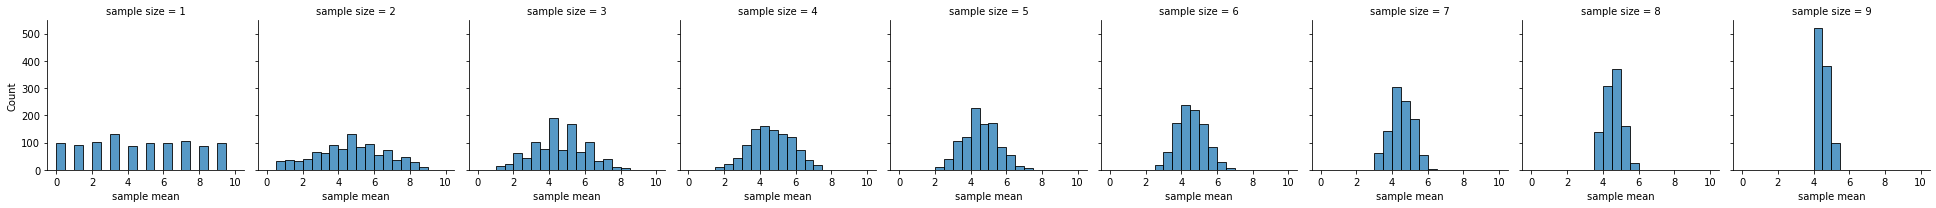

In [8]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

rnum = 10
population = list(range(0, rnum))
num_sample = 1000
max_size_sample = len(population)

df_sampled = pd.DataFrame(columns = ['sample size', 'num_test', 'sample_mean'])
print(df_sampled.info())

for size_sample in range(1, max_size_sample):
    for n in range(0, num_sample):
        sample = np.array(random.sample(population, size_sample))
        # print(sample)
        sampled = pd.DataFrame({'sample size': str(size_sample), 'num_test': [n], 'sample mean': [sample.mean()]})
        df_sampled = df_sampled.append(sampled, ignore_index = True)
        
g = sns.FacetGrid(df_sampled, col = 'sample size')
g.map(sns.histplot, 'sample mean', binwidth = 0.5, binrange=(0, rnum))

df_sampled.plot

문제 2

In [9]:
#%% 1-2 단일표본 t검정
import numpy as np
from scipy.stats import t
n = 100 #표본갯수
mu = 1500 #모평균
x_bar = 1420 #표본평균
S = 200 #표본오차

#t 검정통계량 계산
stat = (x_bar-mu)/(S/np.sqrt(n))
#임계치 계산 alpha = 0.05
c_val = t.ppf(0.05, df=n-1)

print('H1: mu < 1,500')
print('H0: mu >= 1,500')
print('t-stat = %.4f.critical value = %.4f'% (stat, c_val))

if stat > c_val:
  print('Reject H1')
else:
  print('Accept H1')

H1: mu < 1,500
H0: mu >= 1,500
t-stat = -4.0000.critical value = -1.6604
Accept H1


문제 3

In [11]:
from scipy.stats import ttest_rel

x_after = [75, 50, 74, 71, 69, 73, 68, 62, 68, 72, 70, 77, 71, 74, 67, 73, 77, 71, 76, 74]
x_before = [82, 54, 74, 75, 71, 76, 70, 62, 77, 75, 72, 83, 78, 74, 68, 76, 75, 75, 75, 71]

stat, p = ttest_rel(x_before, x_after)

print()
print()
print()
if p > 0.05:
    print('Reject H1')
else:
    print('Accept H1')




Accept H1


문제 4

In [15]:
alpha = 0.05  # 유의수준
n_a = 30  # 표본갯수
x_bar_a = 48500  # 표본평균
S_a = 3600  # 표본오차
n_b = 30  # 표본갯수
x_bar_b = 52000  # 표본평균
S_b = 4200  # 표본오차

# 함동 표준오차 계산
var_ab = np.sqrt(S_a**2/n_a + S_b**2/n_b)
# 자유도 계산
dof_ab = (S_a**2/n_a + S_b**2/n_a)**2/((n_a-1) + (S_b**2/n_b)**2/(n_b-1))

stat = (x_bar_a - x_bar_b) / var_ab

c_val = t.ppf(alpha/2, dof_ab)

print('H1: mu_a ~= mu_b')
print('H0: mu_a = mu_b')
print('t-stat = %.4f, critical value = %.4f' % (stat, c_val))

if stat > c_val:
    print('Reject H1')
else:
    print('Accept H1')

H1: mu_a ~= mu_b
H0: mu_a = mu_b
t-stat = -3.4655, critical value = -1.9875
Accept H1


문제 5

In [17]:
from scipy.stats import chi2
alpha = 0.05  # 유의수준
n = 30  # 표본갯수
sigma2 = 1.2  # 모분산
S2 = 1.7  # 표본분산

# Xai2 검정통계량 계산
stat = (n-1)*S2/sigma2

# 임계치 계산
c_val_l = chi2.ppf(alpha/2, df = n-1)
c_val_u = chi2.ppf(1-alpha/2, df = n-1)

print('H1: sigma2_a != ' + str(sigma2))
print('H0: sigma2_a = ' + str(sigma2))
print('chi2-stat = %.4f, critical value = (%.4f, %.4f)' % (stat, c_val_l, c_val_u))

# 양측검정
if (stat < c_val_l) or (c_val_u < stat):
    print('Accept H1')
else:
    print('Reject H1')

H1: sigma2_a != 1.2
H0: sigma2_a = 1.2
chi2-stat = 41.0833, critical value = (16.0471, 45.7223)
Reject H1


문제 6

In [20]:
# 두 모집단의 분산을 검정하기 (F-test)
from scipy.stats import f

alpha = 0.05  # 유의수준
n_a = 16  # 표본갯수
x_bar_a = 78.3  # 표본평균
S2_a = 37.5  # 표본분산
n_b = 21  # 표본갯수
x_bar_b = 76.7  # 표본평균
S2_b = 98.6  # 표본분산

# F 검정통계량 계산
stat = S2_a/S2_b
# 임계치 계산
c_val = f.ppf(alpha,n_a-1,n_b-1)


# print('H1: sigma2_a != sigma2_b')
# print('H1: sigma2_a < sigma2_b')
# print('H0: sigma2_a >= sigma2_b')
# print('H0: sigma2_a = sigma2_b')
print('H1: sigma2_a/sigma2_b < 1')
print('H0: sigma2_a/sigma2_b = 1')

print('F-stat = %.4f, critical value = %.4f' % (stat, c_val))

if stat > c_val:
    print('Reject H1')
else:
    print('Accept H1')

H1: sigma2_a/sigma2_b < 1
H0: sigma2_a/sigma2_b = 1
F-stat = 0.3803, critical value = 0.4296
Accept H1


In [22]:
# 두 모집단의 분산을 검정하기 (F-test)
from scipy.stats import f

alpha = 0.05  # 유의수준
n_a = 6  # 표본갯수
x_bar_a = 78.3  # 표본평균
S2_a = 37.5  # 표본분산
n_b = 21  # 표본갯수
x_bar_b = 76.7  # 표본평균
S2_b = 98.6  # 표본분산

# F 검정통계량 계산
stat = S2_a/S2_b
# 임계치 계산
c_val = f.ppf(alpha,n_a-1,n_b-1)


# print('H1: sigma2_a != sigma2_b')
# print('H1: sigma2_a < sigma2_b')
# print('H0: sigma2_a >= sigma2_b')
# print('H0: sigma2_a = sigma2_b')
print('H1: sigma2_a/sigma2_b < 1')
print('H0: sigma2_a/sigma2_b = 1')

print('F-stat = %.4f, critical value = %.4f' % (stat, c_val))

if stat > c_val:
    print('Reject H1')
else:
    print('Accept H1')

H1: sigma2_a/sigma2_b < 1
H0: sigma2_a/sigma2_b = 1
F-stat = 0.3803, critical value = 0.2194
Reject H1


> 분포가 왼쪽으로 몰리면서 critical value가 낮아짐에 따라 연구가설은 기각됨

---

문제 1

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
major = ['ma', 'con', 'en', 'ma', 'con', 'ma', 'con', 'en', 'ma', 'en', 'ma', 'en']
soju = [2.5, 0.5, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.5, 3.0, 1.5]

df = pd.DataFrame({'major': major, 'soju': soju})
print(df[df.major == 'con'])
print(df[df.major == 'en'])
print(df[df.major == 'ma'])

# the 'C' indicates categorical data
formula = 'soju ~ C(major)'
model = ols(formula, df).fit()

print(sm.stats.anova_lm(model))  # 선형분산분석 모델

  major  soju
1   con   0.5
4   con   2.0
6   con   1.0
   major  soju
2     en   2.0
7     en   1.0
9     en   0.5
11    en   1.5
   major  soju
0     ma   2.5
3     ma   3.0
5     ma   2.0
8     ma   1.0
10    ma   3.0
           df    sum_sq  mean_sq         F    PR(>F)
C(major)  2.0  3.450000  1.72500  2.976038  0.101844
Residual  9.0  5.216667  0.57963       NaN       NaN


문제 1a

In [ ]:
fac_level = ['A1', 'A2', 'A3', 'A4']
strength = [[8.44, 8.36, 8.28], [8.59, 8.91, 8.60], [9.34, 9.41, 9.69], [8.92, 8.92, 8.74]]

df = pd.DataFrame({'fac_level': fac_level, 'strength': strength})

print(df[df.fac_level == 'A1'])
print(df[df.fac_level == 'A2'])
print(df[df.fac_level == 'A3'])
print(df[df.fac_level == 'A4'])

# res_temp = [60, 65, 70, 75]

formula = ''

문제 2 (주효과 검정만이 가능한 이원분산분석)

In [30]:
filename = 'data_2_2.csv'

# path = 'C:\Users\Conet'
# df = pd.read_csv(path+filename)

df = pd.read_csv(filename)
print(df)

df = df.melt(id_vars=['volumn'], var_name = 'location', value_name = 'sales')
print(df)

formula = 'sales ~ C(volumn) + C(location)'
model = ols(formula, df).fit()

print(sm.stats.anova_lm(model))

   volumn  south  north  column 4
0   large     10      7       NaN
1  medium      8      3       NaN
2   small      4      1       NaN
   volumn  location  sales
0   large     south   10.0
1  medium     south    8.0
2   small     south    4.0
3   large     north    7.0
4  medium     north    3.0
5   small     north    1.0
6   large  column 4    NaN
7  medium  column 4    NaN
8   small  column 4    NaN
              df     sum_sq    mean_sq          F    PR(>F)
C(volumn)    2.0  36.000000  18.000000  27.000000  0.035714
C(location)  2.0  20.337689  10.168845  15.253267  0.061526
Residual     2.0   1.333333   0.666667        NaN       NaN


문제 2a (이원분산분석 주효과+상호작용효과)

In [ ]:
filename = 'data_2_3.csv'

df = pd.read_csv(folder+filename)
print(df)

formula = 'sales ~ C(volumn) * C(location)'
model = ols(formula, df).fit()

print(sm.stats.anova_lm(model))

from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(df.column, df.location, df.sales,
                       colors = ['red', 'blue'], markers=['D', '^'], ms = 10)

import matplotlib.pyplot as plt
plt.show()

문제 3

In [32]:
from scipy.stats import shapiro, bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

filename = 'ex_3_1.csv'
df = pd.read_csv(filename)

a1 = df.strength[df.temp=='A1']
a2 = df.strength[df.temp=='A2']
a3 = df.strength[df.temp=='A3']
a4 = df.strength[df.temp=='A4']

print(a1, a2, a3, a4)
df

4     8.44
7     8.36
11    8.28
Name: strength, dtype: float64 1    8.59
6    8.91
9    8.60
Name: strength, dtype: float64 0    9.34
3    9.41
8    9.69
Name: strength, dtype: float64 2     8.92
5     8.92
10    8.74
Name: strength, dtype: float64


,temp,strength
0,A3,9.34
1,A2,8.59
2,A4,8.92
3,A3,9.41
4,A1,8.44
5,A4,8.92
6,A2,8.91
7,A1,8.36
8,A3,9.69
9,A2,8.60



******* Normality Test *******
A1: stat = 1.0000, p-value = 1.0000
A2: stat = 0.7734, p-value = 0.0525
A3: stat = 0.8929, p-value = 0.3631
A4: stat = 0.7500, p-value = -0.0000

***** Equal Variance Test ******


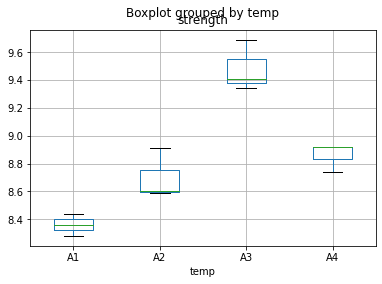

In [34]:
# 정규성; Shapiro Test
print('\n******* Normality Test *******')
df.boxplot('strength', by = 'temp')
s, p = shapiro(a1); print('A1: stat = %.4f, p-value = %.4f' % (s, p))  # 정규성을 만족시킨다.
s, p = shapiro(a2); print('A2: stat = %.4f, p-value = %.4f' % (s, p))  # 정규성을 만족시킨다.
s, p = shapiro(a3); print('A3: stat = %.4f, p-value = %.4f' % (s, p))  # 정규성을 만족시킨다.
s, p = shapiro(a4); print('A4: stat = %.4f, p-value = %.4f' % (s, p))  # 정규성을 만족시키지 못한다.

print('\n***** Equal Variance Test ******')

In [36]:
# 등분산성; 분산의 동질성 검정; Bartlett, Levene Test
s, p = bartlett(a1, a2, a3, a4)
print('Bartlett: stat = %.4f, p = %.4f' % (s,p))  # 등분산으로 간주함

s, p = levene(a1, a2, a3, a4)
print('Levene: stat = %.4f, p = %.4f' % (s,p))  # 등분산으로 간주함

Bartlett: stat = 1.5493, p = 0.6709
Levene: stat = 0.1900, p = 0.9003


In [38]:
import warnings warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (2227165512.py, line 1)

In [37]:
# 일원분산분석
formula = 'strength ~ C(temp)'
model = ols(formula, data=df).fit()
model.summary()
print('\n*** One-Way ANOVA ****')
print(anova_lm(model))
print('')


*** One-Way ANOVA ****
           df  sum_sq  mean_sq          F    PR(>F)
C(temp)   3.0  1.9788  0.65960  31.186761  0.000092
Residual  8.0  0.1692  0.02115        NaN       NaN



C:\Users\Conet\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
model.summary()

C:\Users\Conet\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     31.19
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           9.17e-05
Time:                        09:42:34   Log-Likelihood:                 8.5422
No. Observations:                  12   AIC:                            -9.084
Df Residuals:                       8   BIC:                            -7.145
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.3600      0.084     99.566      0.000       8.166       8.554
C(temp)[T.A2]     0.3400      0.119      2.863      0.021       0.066       0.614
C(temp)[T.A3]     1.1200      0.119      9.432      0.000       0.846       1.394
C(temp)[T.A4]     0.5000      0.119      4.211      0.003       0.226       0.774
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.155
Skew:                           0.588   Prob(JB):                        0.561
Kurtosis:                       2.037   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.resid  # 잔차데이터

0    -1.400000e-01
1    -1.100000e-01
2     6.000000e-02
3    -7.000000e-02
4     8.000000e-02
5     6.000000e-02
6     2.100000e-01
7     1.776357e-15
8     2.100000e-01
9    -1.000000e-01
10   -1.200000e-01
11   -8.000000e-02
dtype: float64

In [41]:
model.fittedvalues

0     9.48
1     8.70
2     8.86
3     9.48
4     8.36
5     8.86
6     8.70
7     8.36
8     9.48
9     8.70
10    8.86
11    8.36
dtype: float64

C:\Users\Conet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Conet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scale-Location Plot')

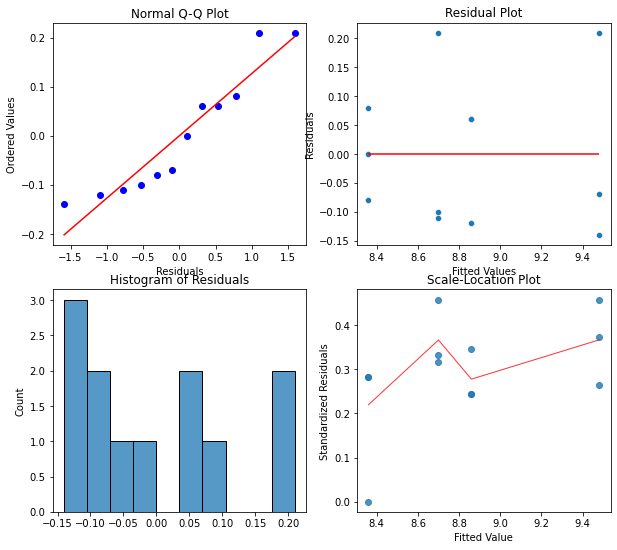

In [46]:
import scipy.stats as stats

# 잔차분석 그래프 그리기 (Normal Q-Q plot, residuals, 
# define figure size
fig = plt.figure(figsize = (10, 9))

# produce regression plots
resid = np.array(model.resid)
fitted = np.array(model.fittedvalues)

# Q-Q plot
ax1 = plt.subplot(221)
stats.probplot(resid, dist='norm', plot = plt)
plt.xlabel('Residuals')
plt.title('Normal Q-Q Plot')

# Residual Plot
ax1 = plt.subplot(222)
sns.scatterplot(fitted, resid)
plt.hlines(0, np.min(fitted), np.max(fitted), color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Histogram
ax1 = plt.subplot(223)
sns.histplot(resid, bins = 10)
plt.title('Histogram of Residuals')

# Scale-Location Plot
ax1 = plt.subplot(224)
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(resid))
sns.regplot(fitted, model_norm_residuals_abs_sqrt,
            scatter = True,
            lowess = True,
            line_kws = {'color': 'red'
                       , 'lw': 1
                       , 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted Value")
plt.title("Scale-Location Plot")

In [52]:
# FWER (Familywise Error Rate): 여러개의 가설 검정 시 적어도 하나의 가설에서 1종오류가 발생할 가능성 존재
# 가설검정을 많이 할 수록 FWER 증가
# 유의수준 5%에서 가설검정을 1번 할 때, 1종오류가 발생하지 않을 확률은 95%, FWER = 100% - 95% = 5%
# 가설검정을 2번했을 때, 2번 모두 1종 오류가 발생하지 않을 확률은 95% * 95% = 90.25%, FWER = 9.75%$
# 가설검정을 3번했을 때, 3번 모두 1종 오류가 발생하지 않을 확률은 95% * 95% * 95% = 85.74%, FWER = 14.26%

from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.strength, df.temp)

# Bonferroni Correction
result = comp.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result[0])

# Tuckey's Honestly Significant Difference = '진정으로 유의미한 차이'
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['strength'], df['temp'], alpha = 0.05)
print(hsd.summary())                    

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A1     A2 -2.9631 0.0414    0.2486  False
    A1     A3 -9.6157 0.0007    0.0039   True
    A1     A4 -6.6034 0.0027    0.0164   True
    A2     A3 -5.2039 0.0065     0.039   True
    A2     A4 -1.3227 0.2565       1.0  False
    A3     A4  5.0567 0.0072    0.0432   True
---------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    A1     A2     0.34 0.0807 -0.0403  0.7203  False
    A1     A3     1.12 0.0001  0.7397  1.5003   True
    A1     A4      0.5 0.0126  0.1197  0.8803   True
    A2     A3     0.78 0.0008  0.3997  1.1603   True
    A2     A4     0.16 0.5615 -0.2203  0.5403  False
    A3     A4    -0.62 0.0035 -1.0003 -0.2397   True
----------------

In [ ]:
filename = 'ex_4_1.csv'
df = pd.read_csv(filename)

df.boxplot('Yield', by = ['A', 'B'])

In [53]:
# 정규성 자동화: Shapiro Test
# dataframe을 array 형태로 변환
dfm = np.array(df.pivot(index = 'B', columns = 'A', values = 'Yield'))
nB, nA = dfm.shape

print('\n** Normality Test**')

for i in range(nA):
    s, p = shapiro(dfm[:,i])
    print('A%i: stat = %.4f, pvalue = %.4f, %s' % (i+1, s, p, check_significance(p)))

for i in range(nB):
    s, p = shapiro(dfm[i,:])
    print('B%i: stat = %.4f, pvalue = %.4f, %s' % (i+1, s, p, check_significance(p)))

print('***************')

KeyError: 'B'

In [50]:
# Bartlett, Levene Test
print('\n*** Equal Variance Test for A***')
s, p = bartlett(dfm[:,0], dfm[:,1], dfm[:,2], dfm[:,3])
print('Bartlett: stat = %.4f, p = %.4f, %s' % (s, p, check_significance(p)))
s, p = levene(dfm[:,0], dfm[:,1], dfm[:,2], dfm[:,3])
print('Levene: stat = %.4f, p = %.4f, %s' % (s, p, check_significance(p)))

print('\n** Equal Variance Test For B**')
s, p = bartlett(dfm[0,:], dfm[1,:], dfm[2,:])
print('Bartlett: stat = %.4f, p = %.4f, %s' % (s, p, check_significance(p)))
s, p = levene(dfm[0,:], dfm[1,:], dfm[2,:])
print('Levene: stat = %.4f, p = %.4f, %s' % (s, p, check_significance(p)))


*** Equal Variance Test for A***


NameError: name 'dfm' is not defined

In [49]:
# 이원분산분석
formula = 'Yield ~ C(A) + C(B)'
model = ols(formula, data = df).fit()
print(model.summary())
print('\n** Two-Way ANOVA**')
print(anova_lm(model))
print('************')

PatsyError: Error evaluating factor: NameError: name 'A' is not defined
    Yield ~ C(A) + C(B)
            ^^^^

In [ ]:
# 사후분석 다중비교
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

# Bonferroni Correction
comp = MultiComparison(df.Yield, df.A)
result = comp.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result[0])

comp = MultiComparison(df.Yield, df.B)
result = comp.allpairtest(scipy.stats.ttest_ind, method = 'bonf')
print(result[0])

# Tuckey's Honestly Significant Difference = '진정으로 유의미한 차이'
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df.Yield, df.A, alpha = 0.05)
print(hsd.summary())
hsd.plot_simultaneous()

hsd = pairwise_tukeyhsd(df.Yield, df.B, alpha = 0.05)
print(hsd.summary())
hsd.plot_simultaneous()

In [ ]:
# 4-2
filename = 'ex_4_2.csv'
df = pd.read_csv(filename)

df.boxplot('Yield', by = ['A', 'B'])

In [ ]:
# 정규성 Shapiro Test

dfm = np.array(df.pivot(index = 'B', columns = 'A', values = 'Yield'))
nB, nA = dfm.shape

print('\n** Normality Test**')

for i in range(nA):
    s, p = shapiro(dfm[:,i])
    print('A%i: stat = %.4f, pvalue = %.4f, %s' % (i+1, s, p, check_significance(p)))

for i in range(nB):
    s, p = shapiro(dfm[i,:])
    print('B%i: stat = %.4f, pvalue = %.4f, %s' % (i+1, s, p, check_significance(p)))

print('***********************')

In [ ]:
# 등분산성; Bartlett, Levene Test
print('\n** Equal Variance Test For A**')
s, p = bartlett(dfm[:,0], dfm[:,1], dfm[:,2])
print('Bartlett: stat = %.4f, p = %.4f, %s' %(s,p, check_significance(p)))
s, p = levene(dfm[:,0], dfm[:,1], dfm[:,2])
print('Levene: stat = %.4f, p = %.4f, %s' %(s, p, check_significance(p)))
print('**************')

print('\n** Equal Variance Test For B**')
s, p = bartlett(dfm[0,:], dfm[1,:], dfm[2,:])
print('Bartlett: stat = %.4f, p = %.4f, %s' %(s,p, check_significance(p)))
s, p = levene(dfm[0,:], dfm[1,:], dfm[2,:])
print('Levene: stat = %.4f, p = %.4f, %s' %(s, p, check_significance(p)))
print('**************')